In [24]:
import polars as pl
import numpy as np
import math
import time

In [25]:
df = pl.read_parquet('./support/tyc2.parquet')
print(df)

shape: (2_430_468, 8)
┌────────────┬────────────┬────────┬─────────┬────────┬─────────┬───────────┬───────────┐
│ RAmdeg     ┆ DEmdeg     ┆ BTmag  ┆ e_BTmag ┆ VTmag  ┆ e_VTmag ┆ HIPCCDM   ┆ Vmag      │
│ ---        ┆ ---        ┆ ---    ┆ ---     ┆ ---    ┆ ---     ┆ ---       ┆ ---       │
│ f32        ┆ f32        ┆ f32    ┆ f32     ┆ f32    ┆ f32     ┆ str       ┆ f32       │
╞════════════╪════════════╪════════╪═════════╪════════╪═════════╪═══════════╪═══════════╡
│ 2.317505   ┆ 2.231843   ┆ 12.146 ┆ 0.158   ┆ 12.146 ┆ 0.223   ┆           ┆ 12.146    │
│ 1.125582   ┆ 2.267394   ┆ 10.488 ┆ 0.038   ┆ 8.67   ┆ 0.015   ┆           ┆ 8.50638   │
│ 1.056865   ┆ 1.897829   ┆ 12.921 ┆ 0.335   ┆ 12.1   ┆ 0.243   ┆           ┆ 12.026111 │
│ 0.050598   ┆ 1.771443   ┆ 11.318 ┆ 0.07    ┆ 10.521 ┆ 0.051   ┆           ┆ 10.44927  │
│ …          ┆ …          ┆ …      ┆ …       ┆ …      ┆ …       ┆ …         ┆ …         │
│ 345.76767  ┆ -88.284042 ┆ 13.108 ┆ 0.271   ┆ 12.48  ┆ 0.196   ┆           ┆ 

In [26]:
df = df.drop(columns=["BTmag","e_BTmag","VTmag","e_VTmag","HIPCCDM"])
df.write_parquet('./support/tyc2-3.parquet')
def stars_for_center_and_radius(df, center, radius, min_mag):
    ra, dec = center
    minra = ra - radius/2
    maxra = ra + radius/2
    mindec = dec - radius/2
    maxdec = dec + radius/2
    return df.filter((pl.col("RAmdeg") < maxra) & (pl.col("RAmdeg") > minra) & (pl.col("DEmdeg") < maxdec) & (pl.col("DEmdeg") > mindec) & (pl.col("Vmag") > min_mag))
    
res = stars_for_center_and_radius(df, [50,5], 2, 8)
print(res.min(), res.max())
print(res)
print(df.min(), df.max())

shape: (1, 3)
┌──────────┬──────────┬──────────┐
│ RAmdeg   ┆ DEmdeg   ┆ Vmag     │
│ ---      ┆ ---      ┆ ---      │
│ f32      ┆ f32      ┆ f32      │
╞══════════╪══════════╪══════════╡
│ 49.05756 ┆ 4.011876 ┆ 8.979381 │
└──────────┴──────────┴──────────┘ shape: (1, 3)
┌───────────┬──────────┬─────────┐
│ RAmdeg    ┆ DEmdeg   ┆ Vmag    │
│ ---       ┆ ---      ┆ ---     │
│ f32       ┆ f32      ┆ f32     │
╞═══════════╪══════════╪═════════╡
│ 50.991394 ┆ 5.998132 ┆ 13.1496 │
└───────────┴──────────┴─────────┘
shape: (94, 3)
┌───────────┬──────────┬───────────┐
│ RAmdeg    ┆ DEmdeg   ┆ Vmag      │
│ ---       ┆ ---      ┆ ---       │
│ f32       ┆ f32      ┆ f32       │
╞═══════════╪══════════╪═══════════╡
│ 49.174763 ┆ 4.671556 ┆ 11.80724  │
│ 49.327896 ┆ 4.26476  ┆ 10.988    │
│ 49.568325 ┆ 4.895411 ┆ 12.00568  │
│ 49.097866 ┆ 4.744157 ┆ 10.44681  │
│ …         ┆ …        ┆ …         │
│ 50.101418 ┆ 5.696984 ┆ 11.839951 │
│ 50.608727 ┆ 5.009947 ┆ 12.396399 │
│ 50.325439 ┆ 5.186826 

In [21]:
RA_values = [ra for ra in range(0, 361, 4)]  # Increment by 4 for a 2-degree radius
Dec_values = [dec for dec in range(-90, 91, 4)]  # Increment by 4 for a 2-degree radius

grid_points = [(ra, dec) for ra in RA_values for dec in Dec_values]

print(len(grid_points))

# Print the grid points
for point in grid_points:
    stars = stars_for_center_and_radius(df, point, 2, 8)
    print(stars.shape)
    #time.sleep(10)


4186
(0, 3)
(9, 3)
(7, 3)
(14, 3)
(18, 3)
(25, 3)
(20, 3)
(29, 3)
(28, 3)
(37, 3)
(28, 3)
(41, 3)
(48, 3)
(35, 3)
(43, 3)
(61, 3)
(47, 3)
(48, 3)
(38, 3)
(40, 3)
(59, 3)
(53, 3)
(44, 3)
(51, 3)
(61, 3)
(52, 3)
(69, 3)
(67, 3)
(79, 3)
(74, 3)
(91, 3)
(89, 3)
(96, 3)
(94, 3)
(111, 3)
(138, 3)
(155, 3)
(139, 3)
(172, 3)
(40, 3)
(41, 3)
(28, 3)
(37, 3)
(15, 3)
(7, 3)
(0, 3)
(0, 3)
(10, 3)
(21, 3)
(34, 3)
(53, 3)
(43, 3)
(54, 3)
(66, 3)
(64, 3)
(75, 3)
(71, 3)
(71, 3)
(76, 3)
(61, 3)
(67, 3)
(94, 3)
(82, 3)
(101, 3)
(103, 3)
(109, 3)
(96, 3)
(88, 3)
(101, 3)
(104, 3)
(126, 3)
(93, 3)
(113, 3)
(115, 3)
(133, 3)
(163, 3)
(159, 3)
(208, 3)
(212, 3)
(212, 3)
(241, 3)
(238, 3)
(323, 3)
(345, 3)
(259, 3)
(97, 3)
(75, 3)
(77, 3)
(61, 3)
(29, 3)
(18, 3)
(0, 3)
(1, 3)
(17, 3)
(30, 3)
(30, 3)
(45, 3)
(55, 3)
(59, 3)
(43, 3)
(72, 3)
(70, 3)
(77, 3)
(78, 3)
(89, 3)
(80, 3)
(67, 3)
(65, 3)
(71, 3)
(92, 3)
(117, 3)
(106, 3)
(93, 3)
(89, 3)
(68, 3)
(104, 3)
(121, 3)
(94, 3)
(92, 3)
(121, 3)
(154, 3)
(147,

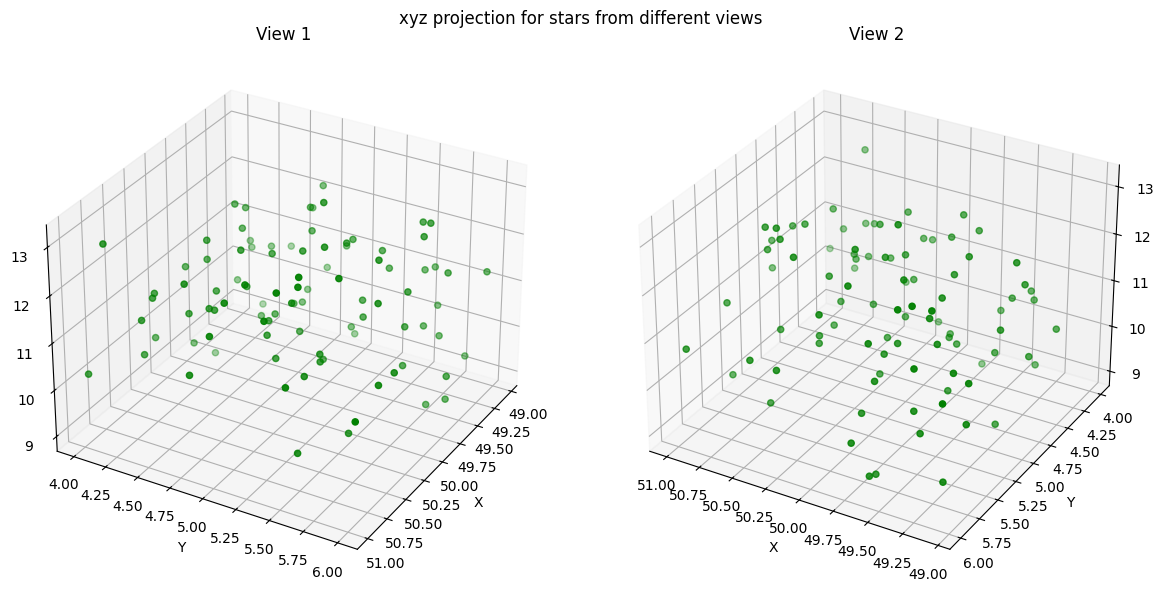

In [19]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # set width ratio for each subplot
coords=res
# First subplot with one viewing angle
ax1 = fig.add_subplot(gs[0], projection='3d')
ax1.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='green')
ax1.view_init(30, 30)  # Set elevation and azimuth
ax1.set_title('View 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Second subplot with another viewing angle
ax2 = fig.add_subplot(gs[1], projection='3d')
ax2.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='green')
ax2.view_init(30, 120)  # Different elevation and azimuth
ax2.set_title('View 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.suptitle('xyz projection for stars from different views')
plt.tight_layout()
plt.show()